In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

%run utility_functions.py # functions reused throughout


-1    4849
 1    1001
Name: cleave, dtype: int64

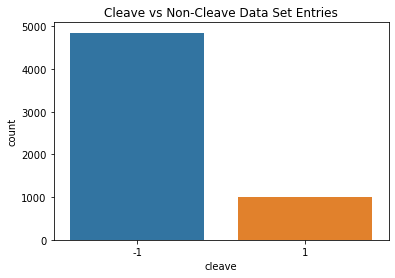

In [2]:
# Dataset source:
#http://archive.ics.uci.edu/ml/datasets/HIV-1+protease+cleavage#
# combined all datasets, removing duplicates

# Read in data
data = pd.read_csv('../data/HIV_DataSet.csv', sep=',')

sns_plot = sns.countplot(data['cleave']) # plot number of things with each value
sns_plot.set(title='Cleave vs Non-Cleave Data Set Entries')
fig = sns_plot.get_figure()
fig.savefig('../images/data_imbalance_hiv.png')

# number of negative cleave values versus positive.
data['cleave'].value_counts(sort=True)
# skewed toward predicting negative because more examples?


In [3]:
# Create training, testing, and validation sets

X = data.drop('cleave', axis=1) # last value is the cleavage
y = data['cleave']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20 default

In [4]:

clf = DecisionTreeClassifier()


parameters = {'random_state': [0],
              'criterion': ['entropy', 'gini'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 20],
              'ccp_alpha': [0.0, .001, .002, .003, .004, .005, .01, .015, .02],
              'max_features': ['log2', 'sqrt','auto'],
             }

# scorer for parameter combinations
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=10, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set clf to best combination of parameters
clf = grid_obj.best_estimator_
# fit to data 
clf.fit(x_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

No Skill: ROC AUC=0.500
Model: ROC AUC=0.841


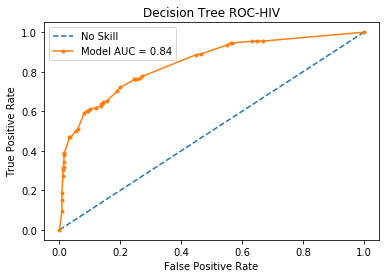

Model: f1=0.531 auc=0.610


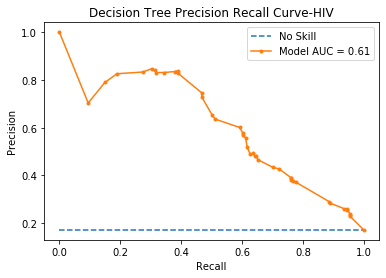

Classification Report
              precision    recall  f1-score   support

          -1       0.89      0.98      0.93       969
           1       0.84      0.39      0.53       201

    accuracy                           0.88      1170
   macro avg       0.86      0.69      0.73      1170
weighted avg       0.88      0.88      0.86      1170

Confusion Matrix
[[954  15]
 [123  78]]
Accuracy
0.882051282051282
Balanced Accuracy
0.6862899126657733


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

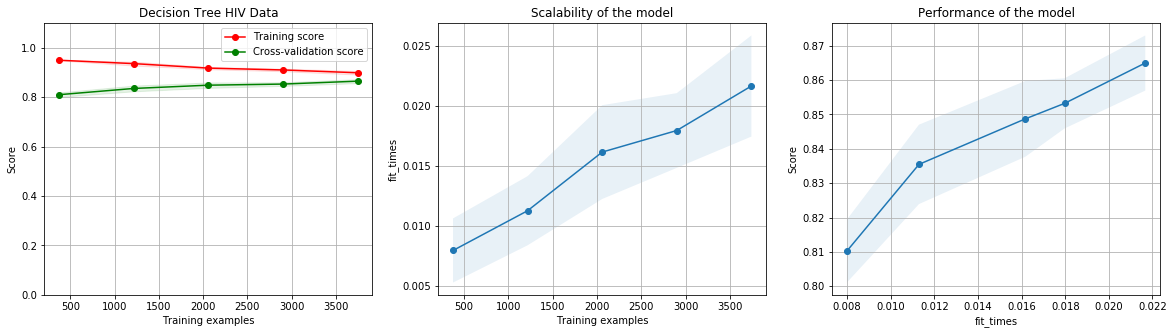

In [12]:
# test
y_predict = clf.predict(x_test)

# ROC
plot_roc(clf, x_test, y_test, y_predict, 'Decision Tree ROC-HIV')
# Recall_precision_curve
plot_precision_recall_curve(clf, x_test, y_test, y_predict, 'Decision Tree Precision Recall Curve-HIV')

# how did we do? Comparing y_test and predicted values
print('Classification Report')
print(classification_report(y_test, y_predict,zero_division=1))
print('Confusion Matrix')
# how to interpret: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
print(confusion_matrix(y_test, y_predict))
print('Accuracy')
print(accuracy_score(y_test, y_predict))

# for unbalanced data
print('Balanced Accuracy')
print(balanced_accuracy_score(y_test, y_predict))

# 1.1 so I can see the top of the plot
plot_learning_curve(clf, "Decision Tree HIV Data", x_train, y_train, ylim=[0,1.1])

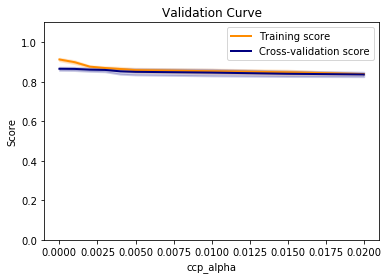

In [8]:
plot_model_complexity_analysis(clf, 'ccp_alpha', [0.0, .001, .002, .003, .004, .005, .01, .015, .02], 'DT_HIV', x_train, y_train)

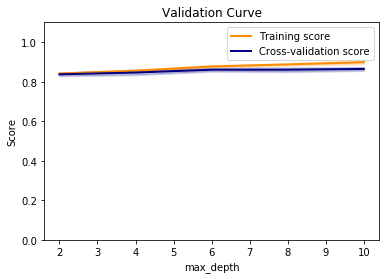

In [9]:
plot_model_complexity_analysis(clf, 'max_depth', [2, 4, 6, 8, 10],'DT_HIV', x_train, y_train)

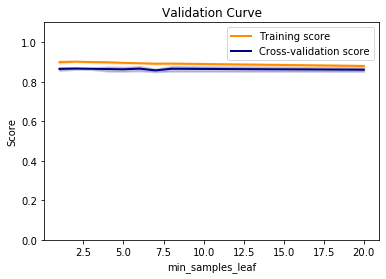

In [10]:
plot_model_complexity_analysis(clf, 'min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 20], 'DT_HIV', x_train, y_train)

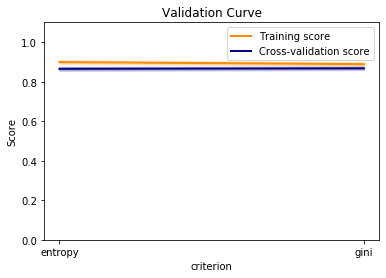

In [11]:
plot_model_complexity_analysis(clf, 'criterion', ['entropy', 'gini'], 'DT_HIV', x_train, y_train)